## SNIPPET HANDLING

## General imports

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

## Setting up folder path

In [8]:
folder = "/Users/rblc/code/iamrblc/laica/examples/snippets/"

## Creating the base snippet dataframe

In [9]:
def snippet_df_maker(folder = folder):
    # Create empty lists to store the data
    file_names = []
    srs = []
    audios = []
    labels = []
    
    file_list = sorted(os.listdir(folder))
    
    for file in file_list:
        # load the audio file with librosa
        audio, sr = librosa.load(os.path.join(folder, file))
        
        # split the filename into the label and ID columns
        label = file.split('_')[0]
        
        # append the extracted features to the lists
        file_names.append(file)
        srs.append(sr)
        audios.append(audio)
        labels.append(label)

        # convert the lists to a pandas dataframe
        snippet_df = pd.DataFrame(
            {'file_name':file_names,
            'sample_rate': srs,
            'audio': audios,
            'label': labels,})
        
        # add length column
        snippet_df['length'] = (snippet_df['audio'].apply(lambda x: len(x))/snippet_df['sample_rate'])
        
        # include only rows where length between 0.2 and 4 seconds
        snippet_df = snippet_df[snippet_df['length'] > 0.2]
        snippet_df = snippet_df[snippet_df['length'] < 4]
         
    return snippet_df

In [10]:
snippet_df = snippet_df_maker()

### Reduce df to the most important features

In [12]:
# Create test_df with only file_name, and label columns
snippet_df = snippet_df[['file_name', 'length', 'sample_rate', 'label']]

### Quick check 

In [15]:
snippet_df.head()

,file_name,length,sample_rate,label
0,bark_00000.wav,0.231973,22050,bark
1,bark_00001.wav,0.695964,22050,bark
2,bark_00002.wav,0.240000,22050,bark
3,bark_00003.wav,0.207982,22050,bark
4,bark_00004.wav,0.552018,22050,bark


In [18]:
snippet_df.head()

,file_name,length,sample_rate,label
0,bark_00000.wav,0.231973,22050,bark
1,bark_00001.wav,0.695964,22050,bark
2,bark_00002.wav,0.240000,22050,bark
3,bark_00003.wav,0.207982,22050,bark
4,bark_00004.wav,0.552018,22050,bark


In [17]:
snippet_df.describe()

,length,sample_rate
count,12340.000000,12340.0
mean,1.047793,22050.0
std,0.845854,0.0
min,0.200998,22050.0
25%,0.400000,22050.0
50%,0.793515,22050.0
75%,1.417007,22050.0
max,3.997007,22050.0


In [19]:
snippet_df['label'].value_counts()

bark     6442
whine    2416
growl    1800
pant      865
yelp      817
Name: label, dtype: int64

<Axes: >

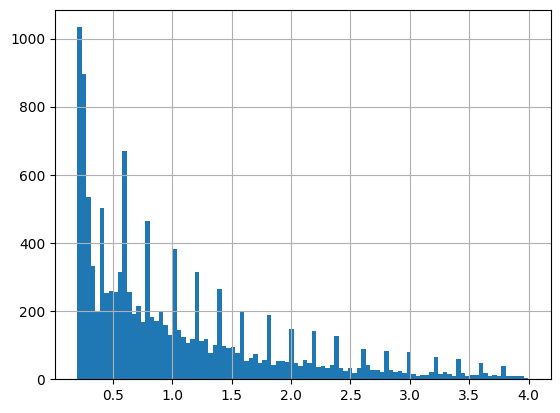

In [20]:
# Histogram of snippet lengths
snippet_df['length'].hist(bins=100)

## Extracting audio features using librosa

### Multiple audio features extraction
<span style="color:red;font-weight:bold">Use it only if you REALLY want to extract many audio features!!!!</span>

In [21]:
'''
def extract_features(row):
    file_path = os.path.join(folder, row['file_name'])
    y, sr = librosa.load(file_path, sr=row['sample_rate'])
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    tonal_centroid = librosa.feature.tonnetz(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_flatness = librosa.feature.spectral_flatness(y=y)
    roll_off_frequency = librosa.feature.spectral_rolloff(y=y, sr=sr)
    return mfcc, spectral_centroid, tonal_centroid, spectral_bandwidth, spectral_contrast, spectral_flatness, roll_off_frequency

# Apply the function to each row in the dataframe
features = snippet_df.apply(extract_features, axis=1)
         
# Add the features to the dataframe as new columns
snippet_df['mfcc'] = features.apply(lambda x: x[0])                   
snippet_df['spectral_centroid'] = features.apply(lambda x: x[1])
snippet_df['tonal_centroid'] = features.apply(lambda x: x[2])
snippet_df['spectral_bandwidth'] = features.apply(lambda x: x[3])
snippet_df['spectral_contrast'] = features.apply(lambda x: x[4])
snippet_df['spectral_flatness'] = features.apply(lambda x: x[5])
snippet_df['roll_off_frequency'] = features.apply(lambda x: x[6])
'''
pass

### Extract MFCCs only
<span style="color:red;font-weight:bold">Comment this out if you need multiple audio feature extraction</span>

In [ ]:
'''
THIS MIGHT BE KEY TO GETTING THE FEATURES OUT OF THE DATAFRAME
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed
    
    
features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    class_label = row["class"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])



'''

In [127]:
def extract_features(row):
    file_path = os.path.join(folder, row['file_name'])
    audio, sr = librosa.load(file_path, sr=row['sample_rate'])
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_processed = np.mean(mfcc.T,axis=0)
    
    return mfcc_processed

'''audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)'''

# Apply the function to each row in the dataframe
features = snippet_df.apply(extract_features, axis=1)

# Add the features to the dataframe as new columns
snippet_df['mfcc'] = features.apply(lambda x: x)              

In [135]:
mfcc_df = snippet_df[['mfcc', 'label']].copy()

In [136]:
mfcc_df.head()

,mfcc,label
0,"[-65.770676, 58.323593, -85.66604, 52.689854, ...",bark
1,"[-65.770676, 58.323593, -85.66604, 52.689854, ...",bark
2,"[-65.770676, 58.323593, -85.66604, 52.689854, ...",bark
3,"[-65.770676, 58.323593, -85.66604, 52.689854, ...",bark
4,"[-65.770676, 58.323593, -85.66604, 52.689854, ...",bark


### Creating mfcc pickle

In [159]:
mfcc_df.to_pickle('mfcc_df.pkl')

In [138]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(mfcc_df.mfcc.tolist())
y = np.array(mfcc_df.label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [139]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [141]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

In [142]:
num_labels = yy.shape[1]
filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

model = build_model_graph()

In [145]:
# Fit the model
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


2023-03-09 21:42:42.451259: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


309/309 [==============================] - 1s 1ms/step - loss: 2.4145 - accuracy: 0.4374 - val_loss: 1.3809 - val_accuracy: 0.5085
Epoch 2/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3536 - accuracy: 0.5171 - val_loss: 1.3259 - val_accuracy: 0.5085
Epoch 3/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3377 - accuracy: 0.5250 - val_loss: 1.3435 - val_accuracy: 0.5085
Epoch 4/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3151 - accuracy: 0.5254 - val_loss: 1.3220 - val_accuracy: 0.5085
Epoch 5/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3038 - accuracy: 0.5254 - val_loss: 1.3220 - val_accuracy: 0.5085
Epoch 6/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3049 - accuracy: 0.5254 - val_loss: 1.3218 - val_accuracy: 0.5085
Epoch 7/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3041 - accuracy: 0.5254 - val_loss: 1.3221 - val_accuracy: 0.5085
Epoch 8/100

In [147]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                

In [151]:
# Print pre-training accuracy to 4 decimal places
print(f"Pre-training accuracy: {accuracy:.4f}%")

Pre-training accuracy: 50.8509%


In [155]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3014 - accuracy: 0.5254 - val_loss: 1.3224 - val_accuracy: 0.5085
Epoch 2/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3015 - accuracy: 0.5254 - val_loss: 1.3222 - val_accuracy: 0.5085
Epoch 3/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3014 - accuracy: 0.5254 - val_loss: 1.3225 - val_accuracy: 0.5085
Epoch 4/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3014 - accuracy: 0.5254 - val_loss: 1.3222 - val_accuracy: 0.5085
Epoch 5/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3014 - accuracy: 0.5254 - val_loss: 1.3222 - val_accuracy: 0.5085
Epoch 6/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3015 - accuracy: 0.5254 - val_loss: 1.3224 - val_accuracy: 0.5085
Epoch 7/100
309/309 [==============================] - 0s 1ms/step - loss: 1.3015 - accuracy: 0.5254 - val_loss: 1.3224 - val_accuracy: 0.5085

In [153]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 52.54%
Testing Accuracy: 50.85%


(0.0, 1.0)

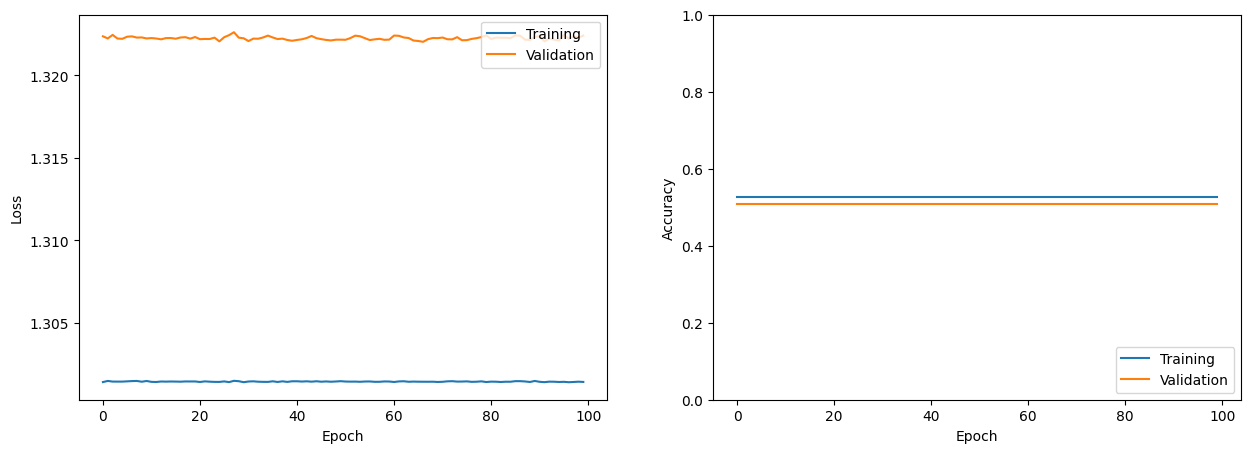

In [158]:
plt.figure(figsize=(15,5))

plt_loss = plt.subplot(121)
plt_loss.plot(history.history["loss"])
plt_loss.plot(history.history["val_loss"])

# plt.title("")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")

plt_accuracy = plt.subplot(122)
plt_accuracy.plot(history.history["accuracy"])
plt_accuracy.plot(history.history["val_accuracy"])
# plt.title("")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="lower right")
plt.ylim(0,1)

# UNTIL HERE!!! THERE REST IS JUST SCRAP CODE

### PYTORCH APPROACH

#### Imports

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## Feature selection with Boruta

The error message "TypeError: only size-1 arrays can be converted to Python scalars" is usually caused by trying to convert an array with multiple values to a Python scalar. This can happen when the code is expecting a single value but gets an array instead.

The error message "ValueError: setting an array element with a sequence" usually occurs when you try to assign a sequence (e.g. list or array) to an array element that expects a scalar value. This can happen if the data types of the array elements are not consistent.

In your code, it's possible that the data types of the feature matrix and target variable are not consistent, or that there are missing or non-numeric values in the data. You could try converting the feature matrix and target variable to numpy arrays using .astype(float) to ensure that they are numeric, and then check if there are any missing values using .isnull().sum(). You could also try removing any rows with missing values using .dropna().

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:


# Assuming X is your feature matrix and y is your target variable
X = snippet_df.drop(['label', 'file_name'], axis=1).values
y = snippet_df['label'].values

# Define a random forest classifier to use as the base estimator
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Initialize the Boruta feature selection algorithm
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Run the Boruta algorithm to select the most important features
boruta.fit(X, y)

# Get the selected features
selected_features = snippet_df.drop(['label', 'file_name'], axis=1).columns[boruta.support_]


ValueError: setting an array element with a sequence.

In this code, we first load the data from a CSV file that contains the audio sample names, target values, and MFCCs. We then extract the MFCCs and target values into separate arrays.

Next, we reshape the MFCCs into a 3D array with shape (number of samples, number of MFCC coefficients, number of time frames, 1). The last dimension is 1 because we have a single channel (gray-scale) for the MFCCs.

Then, we build a CNN model using the Keras Sequential API, with two convolutional layers, two max pooling layers, two dropout layers, and two dense layers. The final layer has a single output and uses a sigmoid activation function, which is suitable for binary classification problems.

Finally, we compile the model with the binary cross-entropy loss function and the Adam optimizer, and train it on the data using a batch size of 32 and 10 epochs. The validation split of 0.1 means that 10% of the data will be used for validation during training.

In [73]:
test_df.columns

Index(['file_name', 'length', 'sample_rate', 'label', 'mfcc', 'mfcc_length'], dtype='object')

In [75]:
# Load the data
mfcc_df = test_df[['file_name','mfcc', 'label']]

In [81]:
# Normalize the MFCCs
mfcc_df['mfcc'] = mfcc_df['mfcc'].apply(lambda x: x / np.linalg.norm(x))

# Truncate the MFCCs to 1000 values - this will cut long ones and pad short ones
mfcc_df['mfcc'] = mfcc_df['mfcc'].apply(lambda x: x[:1000] if len(x) >= 1000 else np.pad(x, (0, 1000 - len(x)), 'constant'))
 

/var/folders/x2/6gs4vmmn5bxgqplmvj03kx240000gn/T/ipykernel_10557/4023332161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfcc_df['mfcc'] = mfcc_df['mfcc'].apply(lambda x: x / np.linalg.norm(x))


: 

: 

In [ ]:
# Extract the MFCCs and target values
X = np.array(mfcc_df['mfcc'].tolist())
y = np.array(mfcc_df['target'])


# Reshape the MFCCs into a 4D tensor
X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)

# Split the data into training and validation sets
dataset = TensorDataset(X, torch.tensor(y))
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.9), len(dataset)-int(len(dataset)*0.9)])
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(3, 3))
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.dropout1 = nn.Dropout2d(p=0.25)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 3))
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.dropout2 = nn.Dropout2d(p=0.25)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.dropout3 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Define the loss function and optimizer
model = CNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model
for epoch in range(10):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.float().unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            val_loss += criterion(y_pred, y_batch.float().unsqueeze(1)).item()
            pred = torch.round(y_pred)
            correct += (pred == y_batch.float().unsqueeze(1)).sum().item()
            total += y_batch.size(0)
    print(f"Epoch {epoch+1} - Train Loss: {loss:.4f} - Val Loss: {val_loss/len(val_loader):.4f} - Val Accuracy: {correct


In PyTorch, convolutional layers expect the input to be a 4D tensor of shape (batch_size, num_channels, height, width). In the case of MFCCs, we have a 2D array (num_frames, num_mfcc), so we need to add an extra dimension for the number of channels.

In the previous example, we used Keras/TensorFlow, which expects a 3D tensor of shape (num_frames, num_mfcc, num_channels), where num_channels is typically 1 for mono audio or 2 for stereo audio.

In [1]:
import tensorflow as tf

In [2]:
import librosa